In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from netCDF4 import Dataset

from shallow_water import create_anim

plt.rcParams['animation.html'] = 'html5'
%load_ext autoreload
%autoreload 2

In [2]:
from shallow_water import SW2D

Lx = Ly = 1e6
dx = dy = 1e4
steps = 300
sw = SW2D(dx, dy, Lx, Ly)

sw.simulate(steps)

100%|██████████| 300/300 [00:00<00:00, 1073.42it/s]

78.5398163396 78.5398163396


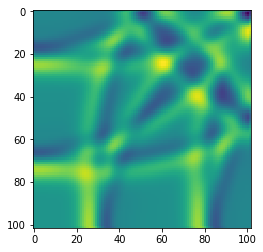

In [4]:
plt.imshow(sw.eta)
plt.show()

In [5]:
with Dataset("SW_L1000000.0_dx10000.0.nc", 'r') as df:
    ETA = df['eta'][:]
    x = df["x"][:]
    y = df["y"][:]

In [6]:
create_anim(sw.x, sw.y, ETA)

In [11]:
from shallow_water import SW2DPeriodic

Lx = Ly = 1e6
dx = dy = 1e4
steps = 1000
sw = SW2DPeriodic(dx, dy, Lx, Ly)

ETA = sw.simulate(steps)

100%|██████████| 1000/1000 [00:00<00:00, 1291.03it/s]


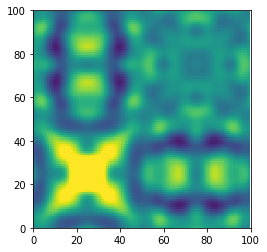

In [12]:
from IPython.display import HTML
anim = sw.create_anim(ETA.shape[0])
HTML(anim.to_html5_video())